**Table of contents**<a id='toc0_'></a>    
- [Imports](#toc1_)    
- [Load data](#toc2_)    
- [Run PyCaret](#toc3_)    
- [Evaluate models](#toc4_)    
  - [Bag top 3 models](#toc4_1_)    
  - [Find best overall model](#toc4_2_)    
  - [Single best  model](#toc4_3_)    
- [Saving to files](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Imports](#toc0_)

In [2]:
import pandas as pd

from sklearn.metrics import log_loss 

from pycaret.classification import *

from controller import Controller

In [3]:
c = Controller('i01')

cols_to_drop = [
    'PROJECT_ID',
    'TRAIN_VAL_TEST_SPLIT',
    'DEADLINE',
    'STATE_CHANGED_AT',
    'CREATED_AT',
    'LAUNCHED_AT',
    'KEYWORDS',
    
    'DESC',
    'NAME',
]

# <a id='toc2_'></a>[Load data](#toc0_)

In [4]:
filepath = fr'{c.get_path_data_prepared()}/01_df_development.pkl'
df_development = pd.read_pickle(filepath)
df_development = df_development.drop(cols_to_drop, axis=1)
df_development

,GOAL,DISABLE_COMMUNICATION,COUNTRY,CURRENCY,BACKERS_COUNT,FINAL_STATUS,CREATE_LAUNCH_HOURS,CREATE_LAUNCH_HOURS_LOG,CREATE_DEADLINE_HOURS,CREATE_DEADLINE_HOURS_LOG,LAUNCHED_DEADLINE_HOURS
0,60000.0,False,US,USD,4,0,2375.831389,7.773524,3095.831389,8.038135,720.000000
1,800.0,False,US,USD,41,1,119.452500,4.791255,1400.657500,7.245411,1281.205000
2,10000.0,False,US,USD,1,0,6345.470556,8.755654,7185.470556,8.879955,840.000000
3,270.0,False,GB,GBP,0,0,0.920833,0.652759,192.920833,5.267450,192.000000
4,5.0,False,GB,GBP,0,0,823.233611,6.714454,1544.233611,7.342930,721.000000
...,...,...,...,...,...,...,...,...,...,...,...
108124,250.0,False,US,USD,24,1,835.094444,6.728742,1373.173056,7.225607,538.078611
108125,5000.0,False,US,USD,0,0,285.817778,5.658847,1005.817778,6.914550,720.000000
108126,45000.0,False,CA,CAD,36,0,310.938611,5.742806,1030.938611,6.939194,720.000000
108127,3000.0,False,US,USD,0,0,152.635278,5.034581,873.635278,6.773807,721.000000


# <a id='toc3_'></a>[Run PyCaret](#toc0_)

In [6]:
s1 = setup(data=df_development, train_size=0.8, target='FINAL_STATUS', session_id=42)

,Description,Value
0,Session id,42
1,Target,FINAL_STATUS
2,Target type,Binary
3,Original data shape,"(108129, 11)"
4,Transformed data shape,"(108129, 28)"
5,Transformed train set shape,"(86503, 28)"
6,Transformed test set shape,"(21626, 28)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [7]:
remove_metric('Kappa')
remove_metric('Accuracy')
add_metric('logloss', 'Log Loss', log_loss, greater_is_better=False)
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7f8a68ca4700>,make_scorer(matthews_corrcoef),pred,{},True,True,False
logloss,Log Loss,Log Loss,<function log_loss at 0x7f8a68ca4ee0>,"make_scorer(log_loss, greater_is_better=False)",pred,{},False,True,True


In [8]:
best = compare_models(sort='MCC', n_select=10)

,Model,AUC,Recall,Prec.,F1,MCC,Log Loss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9507,0.8478,0.7860,0.8157,0.7254,4.4134,1.0640
gbc,Gradient Boosting Classifier,0.9505,0.8405,0.7893,0.8141,0.7235,4.4222,18.4250
catboost,CatBoost Classifier,0.9500,0.8393,0.7874,0.8125,0.7211,4.4622,0.7710
xgboost,Extreme Gradient Boosting,0.9492,0.8400,0.7852,0.8117,0.7197,4.4905,0.5900
ada,Ada Boost Classifier,0.9474,0.8419,0.7807,0.8101,0.7171,4.5472,4.6170
svm,SVM - Linear Kernel,0.0000,0.8212,0.7749,0.7930,0.6975,4.8889,0.6670
rf,Random Forest Classifier,0.9394,0.8123,0.7789,0.7952,0.6964,4.8197,12.9290
dt,Decision Tree Classifier,0.8035,0.7312,0.7343,0.7328,0.6076,6.1443,1.0640
lr,Logistic Regression,0.9164,0.5580,0.8361,0.6690,0.5767,6.3526,2.1930
et,Extra Trees Classifier,0.8846,0.6135,0.7432,0.6721,0.5438,6.8960,7.0450


Processing:   0%|          | 0/78 [00:00<?, ?it/s]

In [9]:
best

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=42, subsample=1.0, tol=0.0001,
              

# <a id='toc4_'></a>[Evaluate models](#toc0_)

## <a id='toc4_1_'></a>[Bag top 3 models](#toc0_)

In [10]:
tuned_top = [tune_model(i, optimize='MCC') for i in best[:4]]

,AUC,Recall,Prec.,F1,MCC,Log Loss
Fold,,,,,,
0,0.9520,0.8416,0.7904,0.8152,0.7251,4.3956
1,0.9505,0.8575,0.7859,0.8201,0.7317,4.3331
2,0.9506,0.8481,0.7869,0.8164,0.7264,4.3956
3,0.9518,0.8480,0.7853,0.8154,0.7250,4.4211
4,0.9510,0.8524,0.7807,0.8150,0.7239,4.4586
5,0.9465,0.8405,0.7799,0.8091,0.7154,4.5711
6,0.9479,0.8369,0.7799,0.8074,0.7131,4.6003
7,0.9511,0.8524,0.7872,0.8185,0.7295,4.3544
8,0.9497,0.8373,0.7816,0.8085,0.7148,4.5711


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,AUC,Recall,Prec.,F1,MCC,Log Loss
Fold,,,,,,
0,0.9519,0.8416,0.7904,0.8152,0.7251,4.3956
1,0.9499,0.8514,0.7857,0.8172,0.7275,4.3872
2,0.9502,0.8467,0.7898,0.8172,0.7279,4.3622
3,0.9514,0.8513,0.7875,0.8182,0.7290,4.3586
4,0.9508,0.8485,0.7820,0.8139,0.7224,4.4711
5,0.9460,0.8351,0.7777,0.8054,0.7101,4.6503
6,0.9471,0.8336,0.7808,0.8064,0.7118,4.6128
7,0.9514,0.8438,0.7895,0.8157,0.7258,4.3919
8,0.9496,0.8307,0.7840,0.8067,0.7126,4.5878


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,AUC,Recall,Prec.,F1,MCC,Log Loss
Fold,,,,,,
0,0.9528,0.8492,0.7898,0.8184,0.7295,4.3414
1,0.9510,0.8618,0.7826,0.8203,0.7317,4.3497
2,0.9512,0.8593,0.7836,0.8197,0.7309,4.3539
3,0.9524,0.8546,0.7847,0.8182,0.7288,4.3752
4,0.9517,0.8618,0.7770,0.8172,0.7269,4.4419
5,0.9473,0.8456,0.7788,0.8108,0.7178,4.5461
6,0.9485,0.8420,0.7794,0.8095,0.7160,4.5669
7,0.9525,0.8546,0.7890,0.8205,0.7324,4.3086
8,0.9507,0.8369,0.7847,0.8099,0.7172,4.5252


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,AUC,Recall,Prec.,F1,MCC,Log Loss
Fold,,,,,,
0,0.9444,0.8897,0.7565,0.8177,0.7270,4.5706
1,0.9430,0.8886,0.7507,0.8138,0.7211,4.6831
2,0.9412,0.8897,0.7419,0.8091,0.7139,4.8372
3,0.9458,0.8839,0.7540,0.8138,0.7211,4.6586
4,0.9418,0.8843,0.7427,0.8073,0.7111,4.8628
5,0.9393,0.8828,0.7518,0.8120,0.7183,4.7086
6,0.9416,0.8882,0.7436,0.8095,0.7144,4.8169
7,0.9450,0.8879,0.7572,0.8174,0.7265,4.5711
8,0.9446,0.8926,0.7483,0.8141,0.7216,4.6961


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## <a id='toc4_2_'></a>[Find best overall model](#toc0_)

In [11]:
blender = blend_models(tuned_top, optimize='MCC')
stacker = stack_models(tuned_top, optimize='MCC')
best_overall_model = automl(optimize='MCC')

# Hard Voting Classifier, i.e. majority wins
best_overall_model

,AUC,Recall,Prec.,F1,MCC,Log Loss
Fold,,,,,,
0,0.9531,0.8430,0.7937,0.8176,0.7288,4.3331
1,0.9509,0.8586,0.7866,0.8210,0.7330,4.3122
2,0.9514,0.8514,0.7905,0.8198,0.7316,4.3122
3,0.9524,0.8524,0.7885,0.8192,0.7306,4.3336
4,0.9514,0.8535,0.7804,0.8153,0.7244,4.4544
5,0.9476,0.8376,0.7777,0.8065,0.7117,4.6294
6,0.9486,0.8387,0.7808,0.8087,0.7151,4.5711
7,0.9523,0.8546,0.7924,0.8223,0.7353,4.2544
8,0.9506,0.8325,0.7838,0.8074,0.7136,4.5753


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,AUC,Recall,Prec.,F1,MCC,Log Loss
Fold,,,,,,
0,0.9476,0.8058,0.8067,0.8062,0.7153,4.4622
1,0.9453,0.8203,0.8086,0.8144,0.7263,4.3081
2,0.9463,0.8134,0.7987,0.8059,0.7136,4.5122
3,0.9476,0.8079,0.8015,0.8047,0.7124,4.5169
4,0.9099,0.6054,0.8333,0.7013,0.6057,5.9420
5,0.9427,0.8058,0.7915,0.7986,0.7027,4.6836
6,0.9427,0.7996,0.7993,0.7995,0.7053,4.6211
7,0.9504,0.8264,0.8071,0.8167,0.7291,4.2752
8,0.9487,0.7996,0.7939,0.7968,0.7008,4.7003


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
predict_holdout = predict_model(best_overall_model)
predict_holdout

,Model,AUC,Recall,Prec.,F1,MCC,Log Loss
0,CatBoost Classifier,0.9507,0.8468,0.7835,0.8139,0.7227,4.4600


,GOAL,DISABLE_COMMUNICATION,COUNTRY,CURRENCY,BACKERS_COUNT,CREATE_LAUNCH_HOURS,CREATE_LAUNCH_HOURS_LOG,CREATE_DEADLINE_HOURS,CREATE_DEADLINE_HOURS_LOG,LAUNCHED_DEADLINE_HOURS,FINAL_STATUS,prediction_label,prediction_score
3916,1500.0,False,US,USD,1,43.600555,3.797746,1122.600586,7.024293,1079.000000,0,0,0.9995
8599,30000.0,False,GB,GBP,1,296.109161,5.694099,1016.109192,6.924720,720.000000,0,0,0.9997
7097,500.0,False,GB,GBP,48,218.682785,5.392185,938.682800,6.845542,720.000000,1,1,0.9357
95698,2500.0,False,US,USD,29,110.929443,4.717869,1190.929443,7.083329,1080.000000,0,0,0.5768
31241,7000.0,False,US,USD,190,1515.260254,7.324002,2235.260254,7.712560,720.000000,1,1,0.8519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85873,45000.0,False,US,USD,1,319.016388,5.768372,1702.993286,7.440730,1383.976929,0,0,0.9998
32824,5000.0,False,CA,CAD,2,35.510277,3.597594,719.998047,6.580637,684.487793,0,0,0.9997
46426,6000.0,False,US,USD,1,2567.172607,7.850950,4007.172607,8.296091,1440.000000,0,0,0.9999
86991,10000.0,False,US,USD,1,322.474152,5.779119,1282.474121,7.157326,960.000000,0,0,0.9999


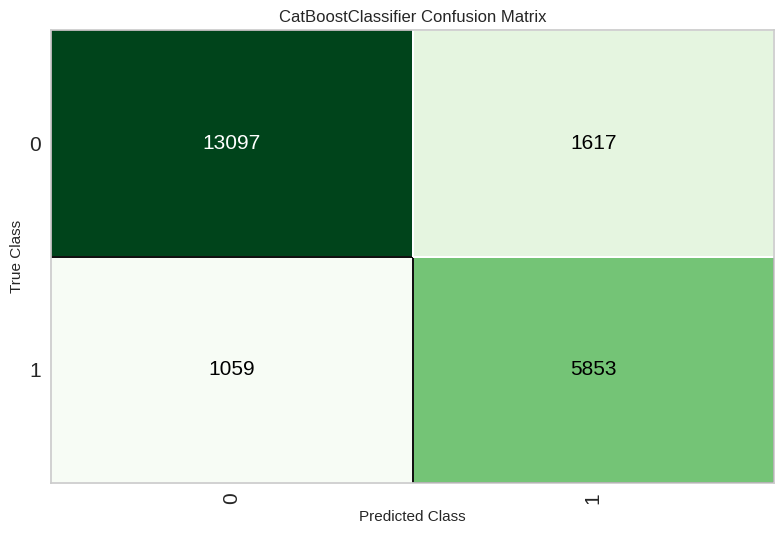

In [13]:
plot_model(best_overall_model, plot='confusion_matrix')

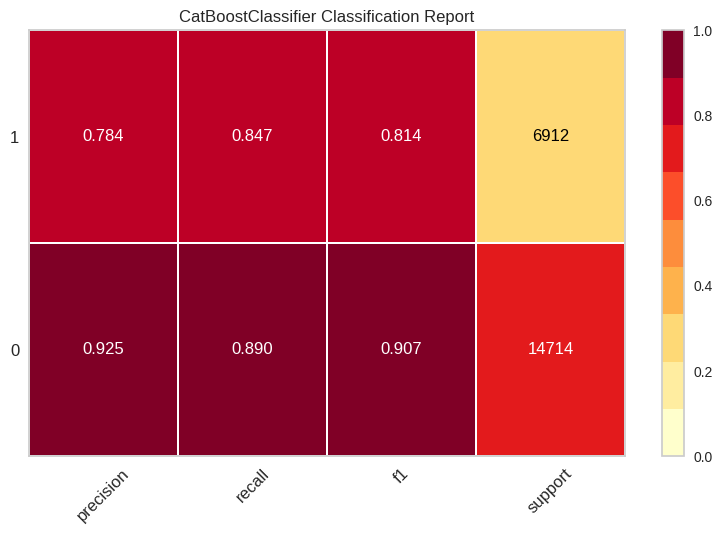

In [14]:
plot_model(best_overall_model, plot='class_report')

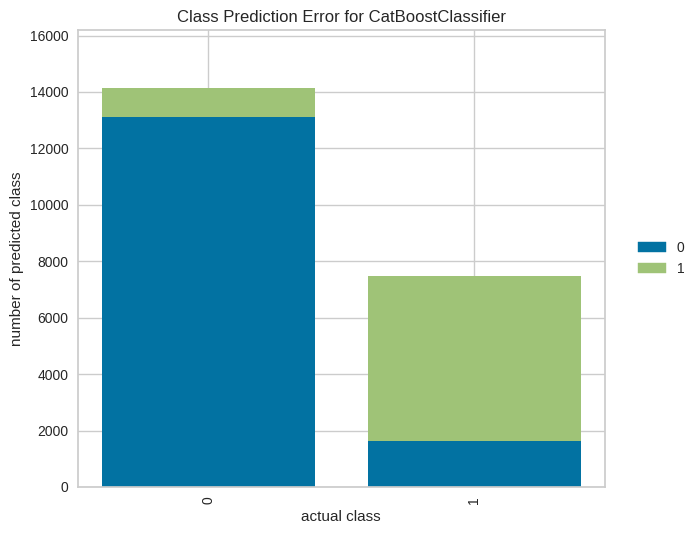

In [15]:
plot_model(best_overall_model, plot='error')

## <a id='toc4_3_'></a>[Single best  model](#toc0_)

In [17]:
best[0]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
lgbm_tuned = tune_model(best[0], optimize='MCC')

,AUC,Recall,Prec.,F1,MCC,Log Loss
Fold,,,,,,
0,0.9520,0.8416,0.7904,0.8152,0.7251,4.3956
1,0.9505,0.8575,0.7859,0.8201,0.7317,4.3331
2,0.9506,0.8481,0.7869,0.8164,0.7264,4.3956
3,0.9518,0.8480,0.7853,0.8154,0.7250,4.4211
4,0.9510,0.8524,0.7807,0.8150,0.7239,4.4586
5,0.9465,0.8405,0.7799,0.8091,0.7154,4.5711
6,0.9479,0.8369,0.7799,0.8074,0.7131,4.6003
7,0.9511,0.8524,0.7872,0.8185,0.7295,4.3544
8,0.9497,0.8373,0.7816,0.8085,0.7148,4.5711


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# <a id='toc5_'></a>[Saving to files](#toc0_)

In [20]:
filename = fr'{c.get_path_iteration()}/pycaret_best_single_model'
save_model(lgbm_tuned, filename)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['GOAL', 'BACKERS_COUNT',
                                              'CREATE_LAUNCH_HOURS',
                                              'CREATE_LAUNCH_HOURS_LOG',
                                              'CREATE_DEADLINE_HOURS',
                                              'CREATE_DEADLINE_HOURS_LOG',
                                              'LAUNCHED_DEADLINE_HOURS'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 cols

In [21]:
filename = fr'{c.get_path_iteration()}/pycaret_best_overall_model'
save_model(best_overall_model, filename)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['GOAL', 'BACKERS_COUNT',
                                              'CREATE_LAUNCH_HOURS',
                                              'CREATE_LAUNCH_HOURS_LOG',
                                              'CREATE_DEADLINE_HOURS',
                                              'CREATE_DEADLINE_HOURS_LOG',
                                              'LAUNCHED_DEADLINE_HOURS'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                                                               verbose='deprecated'))),
                 ('oneh